#  Mutual information of sig and ns mice

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy import stats

from param import *
from utils.plot_utils import label_diff

data_list = ParamDir().data_list
mi_data_dir = ParamDir().OUTPUT_ROOT / "data_exploration/"

In [2]:
KO_ids = [1] # mice that passed the test
pass_res_KO = []
not_pass_res_KO = []
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in str(data_dir).split('/')[-1]]
for mouse_id, data_dir in enumerate(KO_data_list):
    data_name = str(data_dir).split('/')[-1]
    with open(mi_data_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)
    mi = results_all['original MI']
    if mouse_id+1 not in KO_ids:
        not_pass_res_KO.extend(mi)
    else:
        pass_res_KO.extend(mi)

WT_ids = [1, 2, 4] # mice that didn't pass the test
pass_res_WT = []
not_pass_res_WT = []
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in str(data_dir).split('/')[-1]]
for mouse_id, data_dir in enumerate(WT_data_list):
    data_name = str(data_dir).split('/')[-1]
    with open(mi_data_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)
    mi = results_all['original MI']
    if mouse_id+1 in WT_ids:
        not_pass_res_WT.extend(mi)
    else:
        pass_res_WT.extend(mi)

In [3]:
stats.ttest_ind(pass_res_KO, not_pass_res_KO)

Ttest_indResult(statistic=3.591866595710478, pvalue=0.00038723084450297495)

In [4]:
stats.ttest_ind(pass_res_WT, not_pass_res_WT)

Ttest_indResult(statistic=0.32036736575314156, pvalue=0.7488239692252665)

Text(0.5, 0.98, 'mutual information\nvaried num of samples')

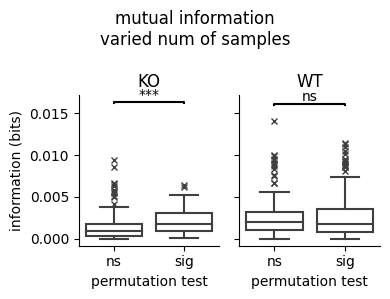

In [6]:
fig, axes = plt.subplots(figsize=(4,3), ncols=2, sharey=True, tight_layout=True)
sns.despine()

sns.boxplot([not_pass_res_KO, pass_res_KO], 
            ax=axes[0],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[0].set_xticklabels(["ns", "sig"])
axes[0].set_title("KO")
axes[0].set_xlabel("permutation test")
label_diff(0, 1, "***", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_KO), np.mean(pass_res_KO)], 
           errors=[np.max(not_pass_res_KO)+.004, np.max(pass_res_KO)+.004], 
           ax=axes[0], 
           barh=.0001)

sns.boxplot([not_pass_res_WT, pass_res_WT],
            ax=axes[1],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[1].set_xticklabels(["ns", "sig"])
axes[1].set_title("WT")
axes[1].set_xlabel("permutation test")
label_diff(0, 1, "ns", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_WT), np.mean(pass_res_WT)], 
           errors=[np.max(not_pass_res_WT)-.002, np.max(pass_res_WT)-.002], 
           ax=axes[1], 
           barh=.0001)


axes[0].set_ylabel("information (bits)")
plt.suptitle("mutual information\nvaried num of samples")